# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [161]:
%matplotlib inline

In [162]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, how = 'left', on="Mouse ID")

# Display the data table for preview
merged_data.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [163]:
merged_data.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [164]:
# Checking the number of mice
merged_data['Mouse ID'].nunique()

249

In [177]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouse 

array(['g989'], dtype=object)

In [176]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mouse) == False]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [178]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mouse) == False]
cleaned_data.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [58]:
# Checking the number of mice in the clean DataFrame.
cleaned_data['Mouse ID'].nunique()

248

## Summary Statistics

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regime

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mean_tumor_volume = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_volume_variance = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_volume_std_dev = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_volume_std_err = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stat = pd.DataFrame({'Mean Tumor Volume': mean_tumor_volume,
                             'Median Tumor Volume': median_tumor_volume,
                             'Tumor Volume Variance': tumor_volume_variance,
                             'Tumor Volume Std. Dev.': tumor_volume_std_dev,
                             'Tumor Volume Std. Err.': tumor_volume_std_err
                            })
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [71]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stat_new = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(mean='mean',
                                                                                       median='median',
                                                                                       var='var',
                                                                                       std='std',
                                                                                       sem='sem')

summary_stat_new

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Drug Regimen')

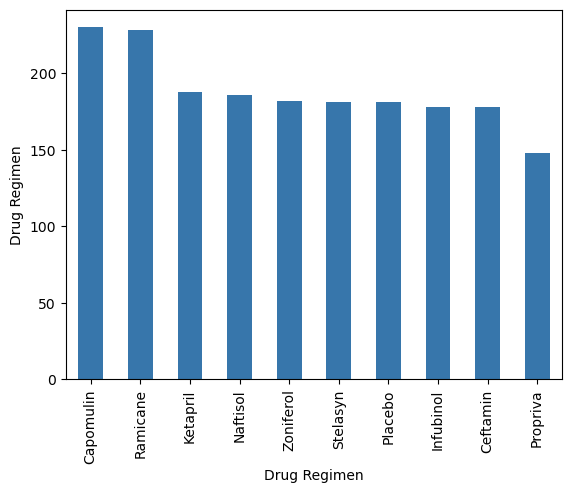

In [119]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

count_df = cleaned_data['Drug Regimen'].value_counts()
count_df.plot(kind='bar', color='#3776ab')
plt.ylabel('# of Observed Mouse Timepoint')
plt.ylabel('Drug Regimen')

<BarContainer object of 10 artists>

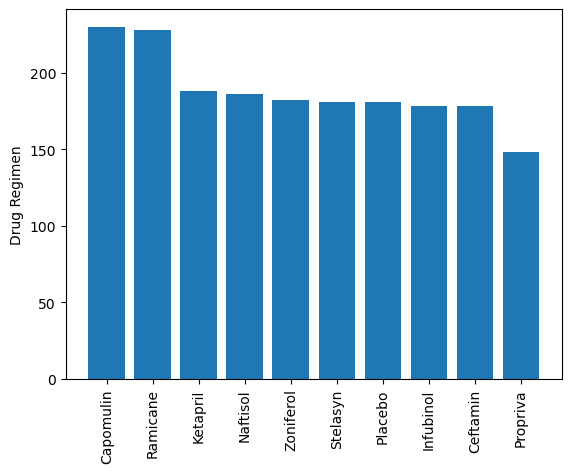

In [120]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# plt.plot
plt.xticks(rotation ='vertical')
plt.ylabel('# of Observed Mouse Timepoint')
plt.ylabel('Drug Regimen')
plt.bar(count_df.index, count_df.values)


In [148]:
male_mice_count = cleaned_data.loc[cleaned_data['Sex'] == 'Male', 'Mouse ID'].count()
female_mice_count =  cleaned_data.loc[cleaned_data['Sex'] == 'Female', 'Mouse ID'].count()


,mice_count
Male,958
Female,922


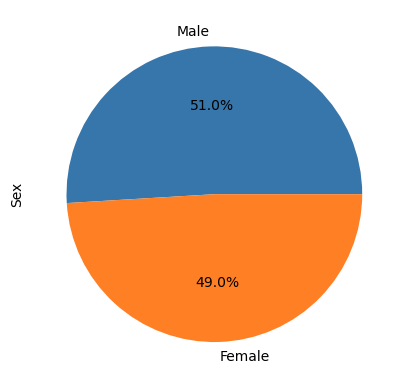

In [200]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_vs_male = pd.DataFrame({'mice_count': [male_mice_count, female_mice_count]}, index=['Male', 'Female'])
female_vs_male.plot.pie(y='mice_count', colors=['#3776ab', '#FF7F24'], autopct='%1.1f%%',legend=False)
plt.ylabel('Sex')
female_vs_male

Text(0, 0.5, 'Sex')

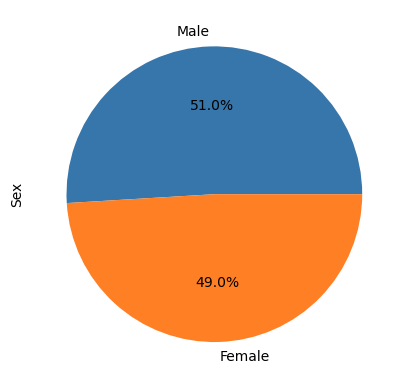

In [149]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
names = ['Male','Female']
mice_count = [male_mice_count, female_mice_count]
colors = ['#3776ab', '#FF7F24']
plt.pie(mice_count, labels=names, colors=colors, autopct='%1.1f%%')
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [175]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Capomulin, Ramicane, Infubinol, and Ceftamin
# treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
final_tumor_volume = pd.merge(last_timepoint, merged_data, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatments)]
final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [204]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.  
    # Locate the rows which contain mice on each drug and get the tumor volumes 
    # add subset 
    # Determine outliers using upper and lower bounds
    
tumor_vol_data = []
for x in treatments:
    treatments_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == x]['Tumor Volume (mm3)']
    tumor_vol_data.append(treatments_data)
    qtl = treatments_data.quantile([0.25, 0.5, 0.75])
    lower = qtl[0.25] - 1.5 *(qtl[0.75] - qtl[0.25])
    upper = qtl[0.75] + 1.5 *(qtl[0.75] - qtl[0.25])
    outliers = treatments_data[(treatments_data < lower) | (treatments_data > upper)]
    print(qtl)
    

0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64


Text(0, 0.5, 'Final Tumor Volume (mm3)')

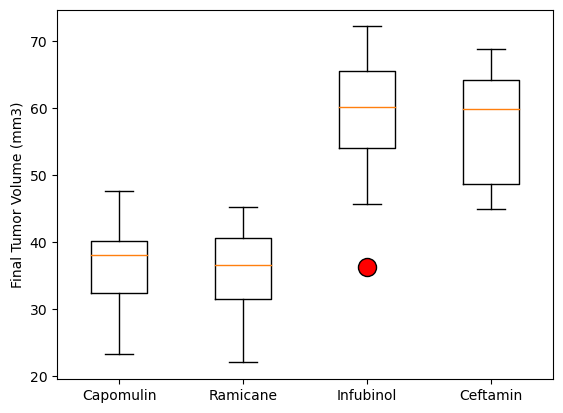

In [205]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments,flierprops=dict(marker='o', markersize=13, markerfacecolor='red'))
plt.ylabel('Final Tumor Volume (mm3)')


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomuline treatment of mouse b128')

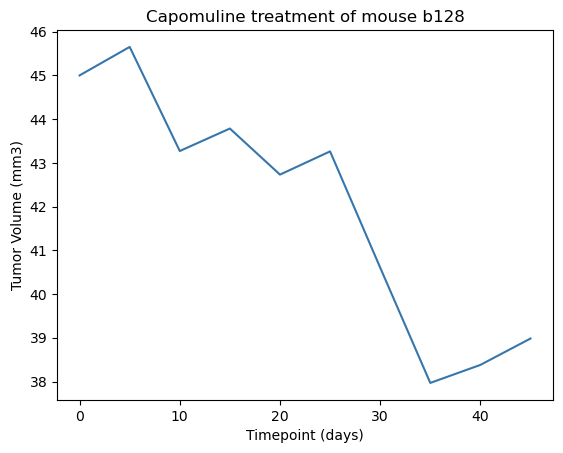

In [218]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Capomuline treatment of mouse 1509
single_mouse = cleaned_data[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == 'b128')]
plt.plot(single_mouse['Timepoint'], single_mouse['Tumor Volume (mm3)'],linestyle='-', color='#3776ab')
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomuline treatment of mouse b128")


Text(0, 0.5, 'Average Tumor Volume (mm3)')

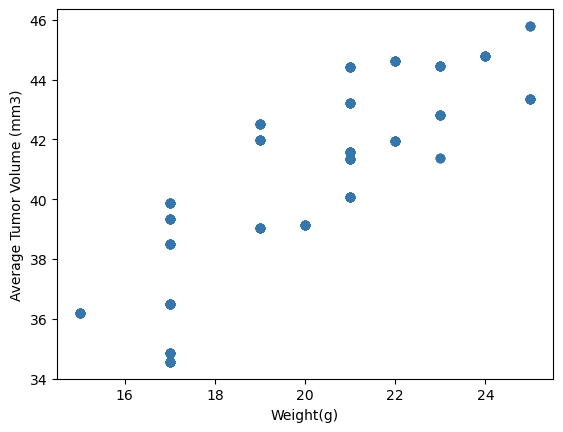

In [240]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = cleaned_data[cleaned_data['Drug Regimen'] =='Capomulin']
avg_tumor_volume = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index(name='Tumor Volume (mm3)_Avg')
new_data = pd.merge(capomulin, avg_tumor_volume, on='Mouse ID')
plt.scatter(new_data['Weight (g)'], new_data['Tumor Volume (mm3)_Avg'], color='#3776ab')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')


## Correlation and Regression

In [247]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

